## 1.-  Import libraries



In [1]:
# KAGGLE DATASET"

# Acknowledgements
# Creators:

# Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
# University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
# University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
# V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
# Donor:
# David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
import eli5 
from eli5.sklearn import PermutationImportance
import shap 
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from pdpbox import pdp, info_plots 
from sklearn.model_selection import StratifiedKFold
sns.set(style="darkgrid")
%matplotlib inline
plt.style.use('seaborn-talk')

Using TensorFlow backend.
c:\users\delia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\delia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2.- Loading our dataset

In [3]:
mainpath = r"C:\Users\dataset"
filename = "heart.csv"


df = pd.read_csv(mainpath + "/" + filename)

## 3.- Basics and descriptive analysis

* Dimension for our dataset

In [4]:
print(f"Number of rows {df.shape[0]} and number of cols {df.shape[1]}")

Number of rows 303 and number of cols 14


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Target variable

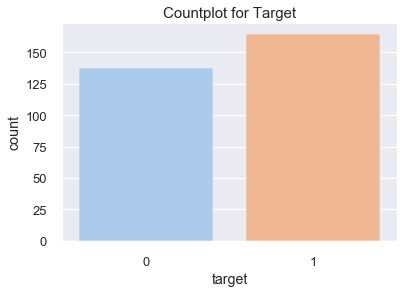

In [6]:
sns.countplot("target", data= df, palette="pastel")
plt.title("Countplot for Target", fontsize=15 )
plt.show()

* Brief description of variables

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Skewness

In [8]:
hskew = [x for x in df.skew() if x>0.7 or x<-0.7]

print(f"Skewed greater than abs(0.7): {hskew}")

Skewed greater than abs(0.7): [-0.7913351914808203, 0.7137684379181473, 1.143400820669338, 1.986651930914453, 0.7425315444212811, 1.269719930601999, 1.3104221354767824]


* Kurtosis

In [9]:
hkurt = [x for x in df.kurtosis() if x>1.5 or x<-1.5]
print(f"Kurtosis greater than abs(1.5): {hkurt}")

Kurtosis greater than abs(1.5): [4.505423167753703, 1.9596776292633895, 1.5758130733382525, -1.9807828625705401]


* Names of columns

In [10]:
data_cols = df.columns.values.tolist()
print(data_cols)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


* Checking for 0 nan values as per df.info() output


In [11]:
print(f"Number of nan values in this dataset: {pd.isnull(df).values.sum()}")

Number of nan values in this dataset: 0


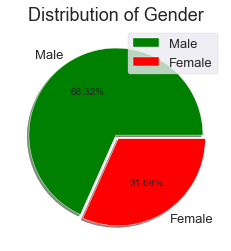

In [12]:
size = df["sex"].value_counts()
colors = ["green", "red"]
labels = ["Male", "Female"]

explode = [0, 0.05]

plt.pie(size, colors=colors, labels=labels, explode=explode, shadow=True, autopct='%.2f%%')
plt.title('Distribution of Gender', fontsize = 18)
plt.legend()
plt.show()

In [13]:
categorical_val = []
continuous_val = []

for i in df.columns:
    print("=====================================================================================")
    print(f"{i}: {df[i].unique()} unique values")
    if len(df[i].unique())>10:
        continuous_val.append(i)
    else:
        categorical_val.append(i)

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] unique values
sex: [1 0] unique values
cp: [3 2 1 0] unique values
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] unique values
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 

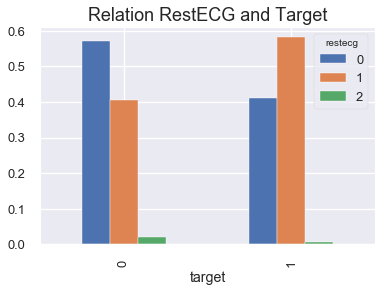

In [14]:
t = pd.crosstab(df["target"], df["restecg"])

t.div(t.sum(1).astype(float), axis=0).plot(kind="bar")
plt.title("Relation RestECG and Target", fontsize=18)
plt.show()

* Visual representation for the numeric variables

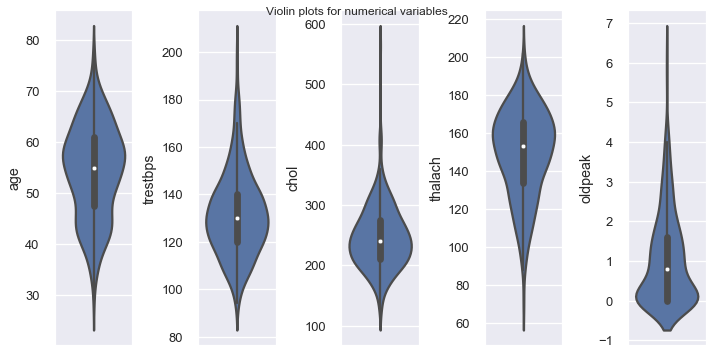

In [15]:
n_rows = 1
n_cols = 5

cols  = df.columns

count_list = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for i in range(n_rows):  
    fig, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(10,5))
    for j in range(n_cols):
        sns.violinplot(y=count_list[i*n_cols+j], data=df, ax=ax[j])
        
plt.suptitle("Violin plots for numerical variables")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

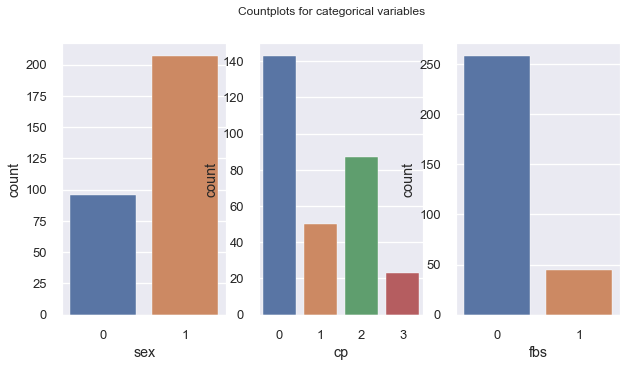

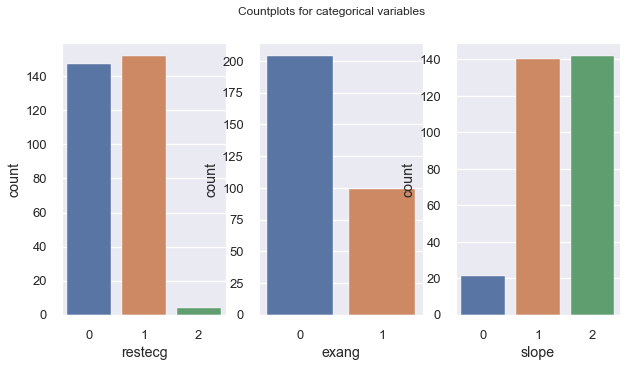

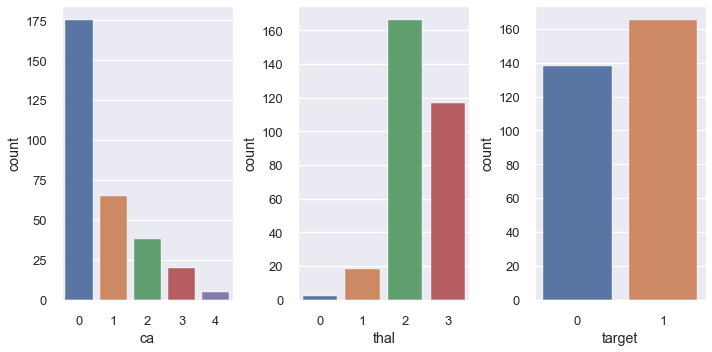

In [16]:
n_rows=3
n_cols=3

ncount_list = [x for x in cols if x not in count_list]


for i in range(n_rows):
    plt.suptitle("Countplots for categorical variables")
    fig, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(10,5))
    for j in range(n_cols):
        sns.countplot(x=ncount_list[i*n_cols+j], data=df, ax=ax[j])


plt.tight_layout()


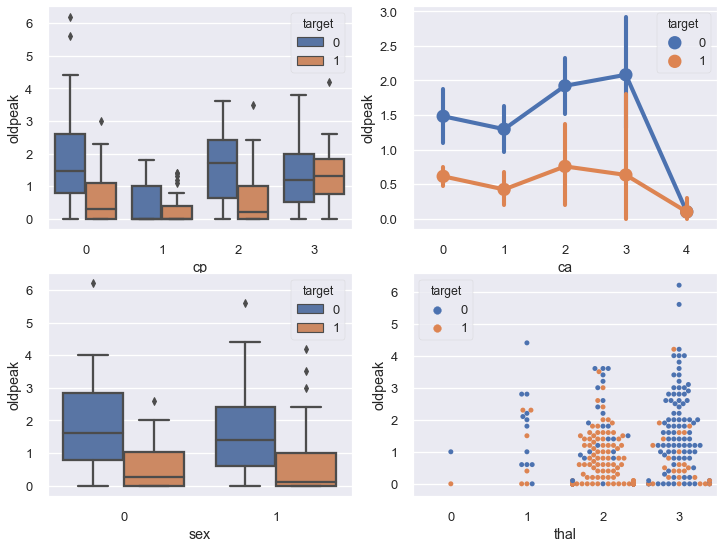

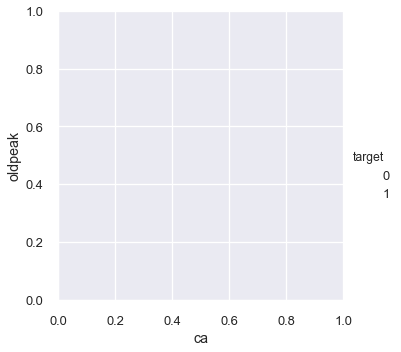

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,9))

sns.boxplot(y="oldpeak", x="cp", data=df, hue="target", ax=ax[0,0])
sns.boxplot(y="oldpeak", x="sex", data=df, hue="target",ax=ax[1,0])
sns.factorplot(y="oldpeak", x="ca", data=df, hue="target",ax=ax[0,1])
sns.swarmplot(y="oldpeak", x="thal", data=df, hue="target",ax=ax[1,1])
plt.show()

* Correlations

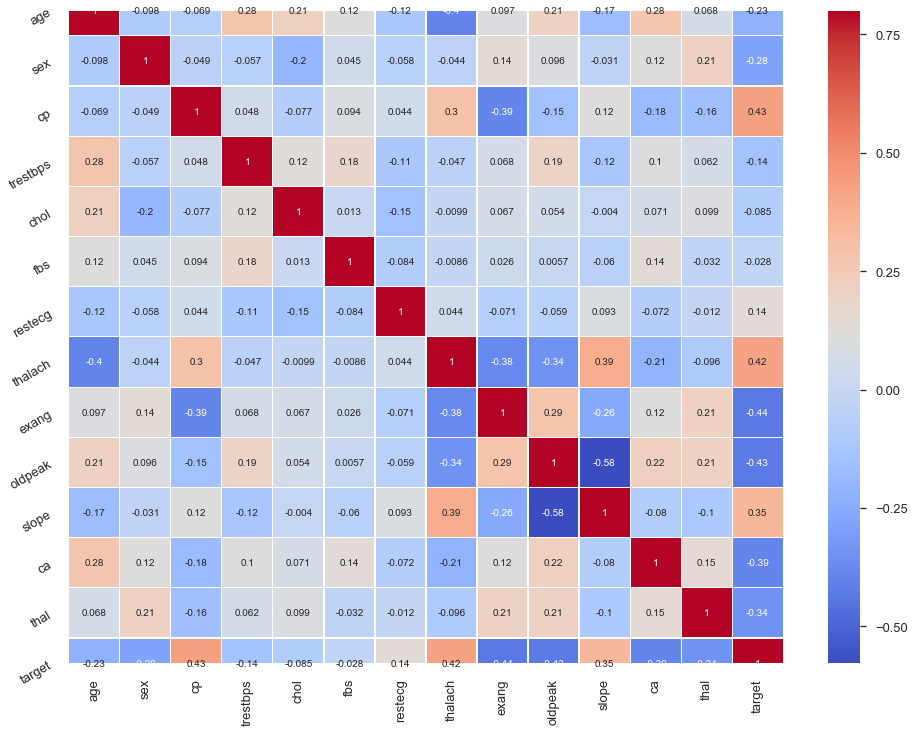

In [18]:
d_corr = df.corr()

plt.figure(figsize=(16,12))

fig = sns.heatmap(d_corr, cmap="coolwarm", annot=True, cbar=True, vmax=0.8, linewidths=.1)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_yticklabels(fig.get_yticklabels(), rotation=30) 
plt.show()

In [19]:
d_corr["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [20]:
cor_list = []
threshold = 0.40

for i in range(0,len(cols)):
    for j in range(i+1, len(cols)):
        if (d_corr.iloc[i,j] > threshold) and (d_corr.iloc[i,j] < 1) or (d_corr.iloc[i,j] < -threshold) and (d_corr.iloc[i,j] <0):
            cor_list.append([d_corr.iloc[i,j], i, j])   

In [21]:
s_cor_list = sorted(cor_list, key = lambda x:abs(-x[0]))

for v,i,j in s_cor_list:
    print(f"{cols[i]} and {cols[j]} with a correlation: {v}")

thalach and target with a correlation: 0.4217409338106738
oldpeak and target with a correlation: -0.4306960016873676
cp and target with a correlation: 0.4337982615068916
exang and target with a correlation: -0.4367570833532994
oldpeak and slope with a correlation: -0.577536816729141


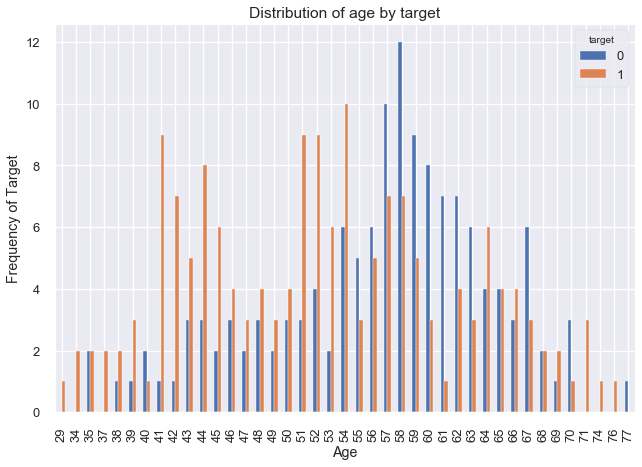

In [22]:
plt.style.use('seaborn-talk')
pd.crosstab(df["age"], df["target"]).plot(kind="bar")
plt.title("Distribution of age by target")
plt.xlabel('Age')
plt.ylabel('Frequency of Target')
plt.show()

* Histograms

In [23]:
def hist_per_target (data, variable):
    m = plt.hist(df[df["target"]==1][variable], color="red", label="Target_1", bins=35)
    b = plt.hist(df[df["target"]==0][variable], color="green", label="Target_0", bins=35)
    plt.xlabel(variable)
    plt.title(f"Histogram for variable {variable} for Target_0 and Target_1", fontsize=10)
    plt.legend()


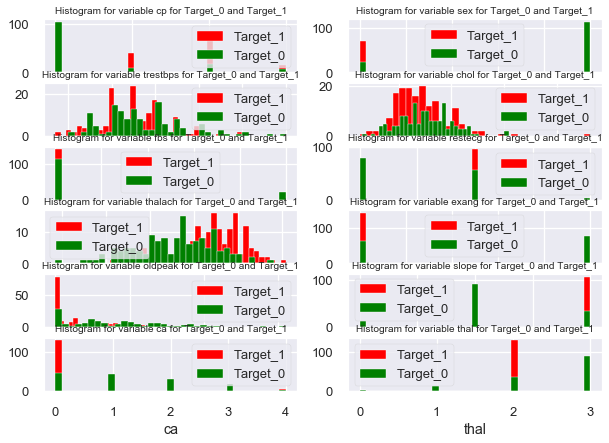

In [24]:
plt.subplots(figsize=(10,8))

plt.subplot(7,2,1) 
hist_per_target(df, "cp")

plt.subplot(7,2,2)
hist_per_target(df, "sex")

plt.subplot(7,2,3) 
hist_per_target(df, "trestbps")

plt.subplot(7,2,4)
hist_per_target(df, "chol")

plt.subplot(7,2,5) 
hist_per_target(df, "fbs")

plt.subplot(7,2,6)
hist_per_target(df, "restecg")

plt.subplot(7,2,7) 
hist_per_target(df, "thalach")

plt.subplot(7,2,8)
hist_per_target(df, "exang")

plt.subplot(7,2,9) 
hist_per_target(df, "oldpeak")

plt.subplot(7,2,10)
hist_per_target(df, "slope")

plt.subplot(7,2,11)
hist_per_target(df, "ca")

plt.subplot(7,2,12)
hist_per_target(df, "thal")



* Most common values for each value depending on value of Target

In [25]:
for i in range(len(cols)):
    m = df[df["target"]==1][cols[i]]
    b = df[df["target"]==0][cols[i]]
    print(f"2 most common values for variable {cols[i]} are: {Counter(m).most_common(2)} for Target_1")
    print(f"2 most common values for variable {cols[i]} are: {Counter(b).most_common(2)} for Target_0")

2 most common values for variable age are: [(54, 10), (41, 9)] for Target_1
2 most common values for variable age are: [(58, 12), (57, 10)] for Target_0
2 most common values for variable sex are: [(1, 93), (0, 72)] for Target_1
2 most common values for variable sex are: [(1, 114), (0, 24)] for Target_0
2 most common values for variable cp are: [(2, 69), (1, 41)] for Target_1
2 most common values for variable cp are: [(0, 104), (2, 18)] for Target_0
2 most common values for variable trestbps are: [(130, 23), (120, 23)] for Target_1
2 most common values for variable trestbps are: [(140, 15), (120, 14)] for Target_0
2 most common values for variable chol are: [(204, 4), (211, 4)] for Target_1
2 most common values for variable chol are: [(254, 4), (282, 4)] for Target_0
2 most common values for variable fbs are: [(0, 142), (1, 23)] for Target_1
2 most common values for variable fbs are: [(0, 116), (1, 22)] for Target_0
2 most common values for variable restecg are: [(1, 96), (0, 68)] for T

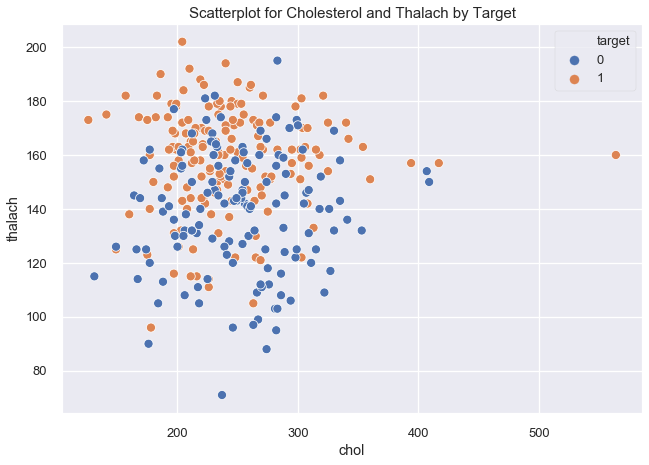

In [26]:
sns.scatterplot(x=df["chol"], y=df["thalach"], hue="target", data=df)
plt.title("Scatterplot for Cholesterol and Thalach by Target", fontsize=15)
plt.show()

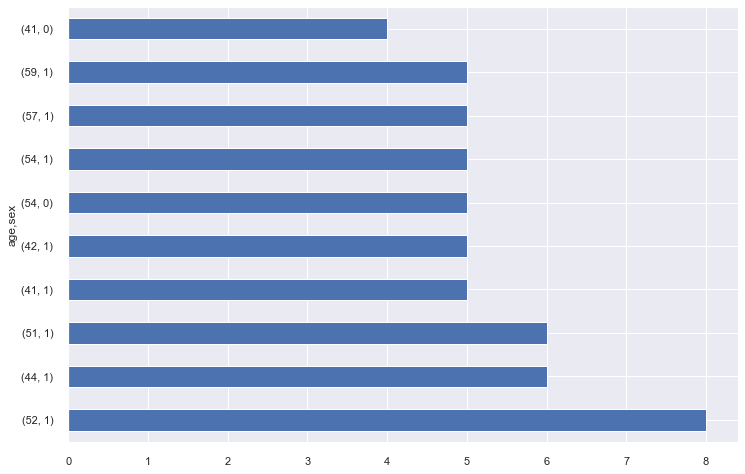

In [27]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

a  = df.groupby(["age", "sex"])["target"].sum().nlargest(10).plot(kind='barh')

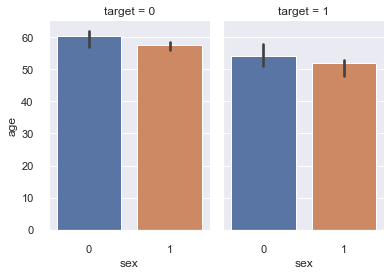

In [28]:
ax  = sns.catplot(x="sex", y="age", col="target", data=df, estimator=median, kind="bar", height=4, aspect=.7)

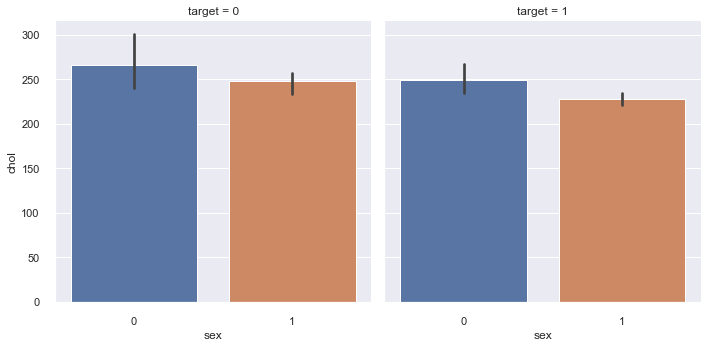

In [29]:
ax = sns.catplot(data=df, x="sex", y="chol", col="target", estimator=median, kind="bar")

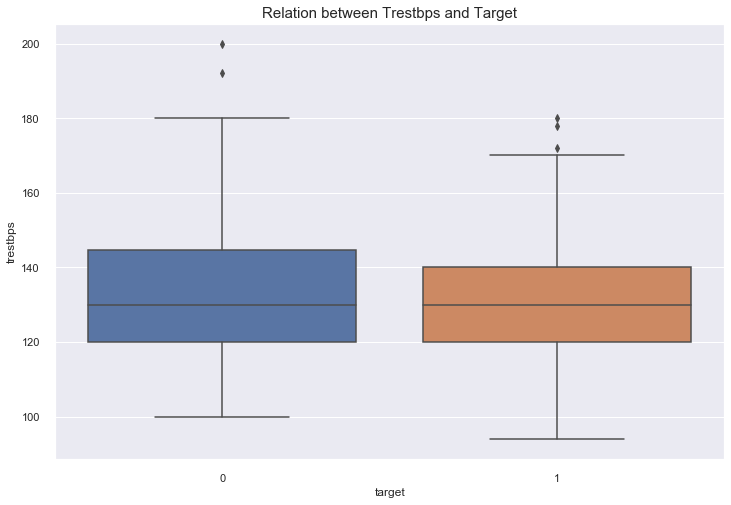

In [30]:
sns.boxplot(data=df, x="target", y="trestbps")
plt.title("Relation between Trestbps and Target", fontsize = 15, fontweight = 30)
plt.show()

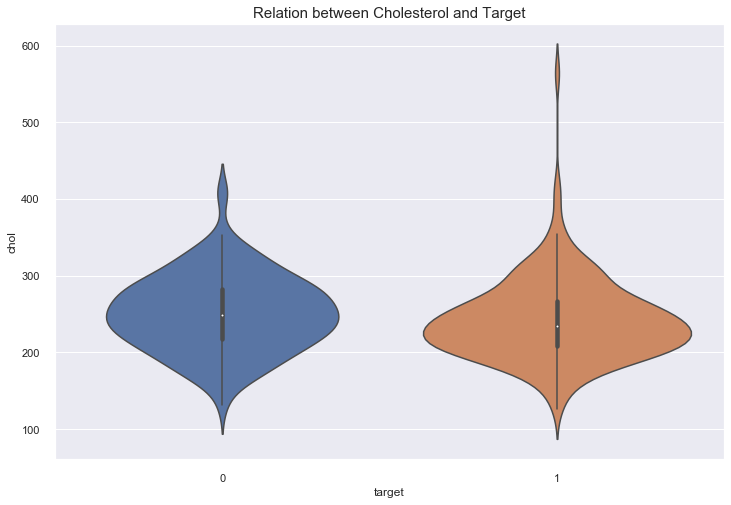

In [31]:
sns.violinplot(data=df, y="chol", x="target")
plt.title("Relation between Cholesterol and Target", fontsize = 15, fontweight = 30)
plt.show()

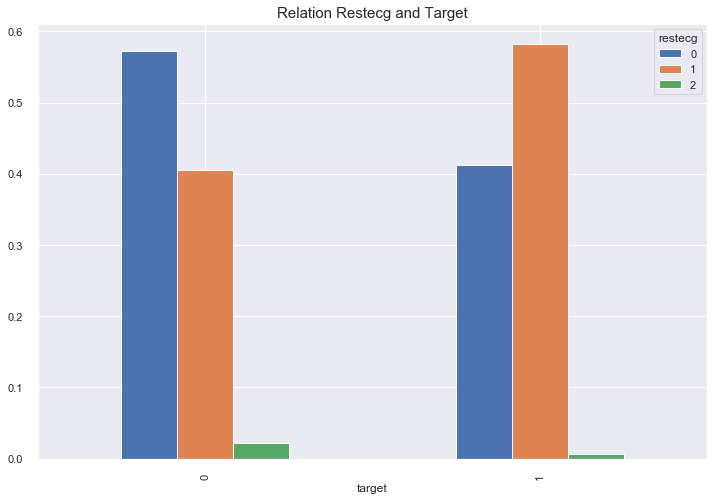

In [32]:
tb = pd.crosstab(df["target"], df["restecg"])
tb.div(tb.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title("Relation Restecg and Target", fontsize = 15, fontweight = 30)
plt.show()

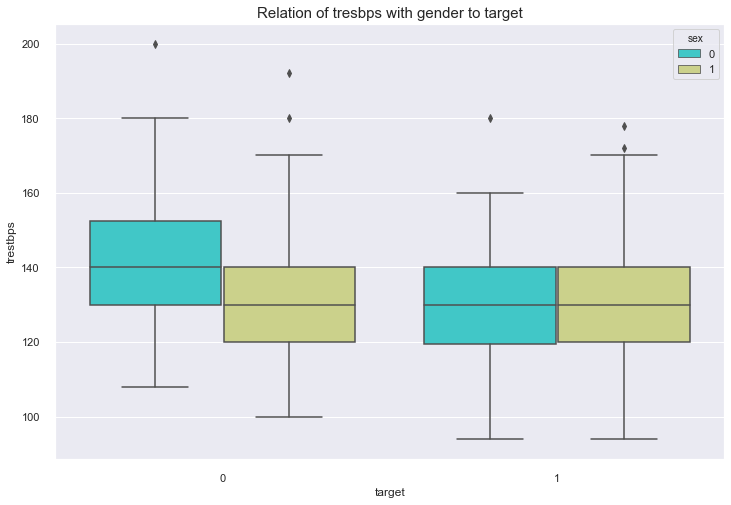

In [33]:
sns.boxplot(x = df['target'], y = df['trestbps'], hue = df['sex'], palette = 'rainbow')
plt.title('Relation of tresbps with gender to target', fontsize = 15, fontweight = 30)
plt.show()

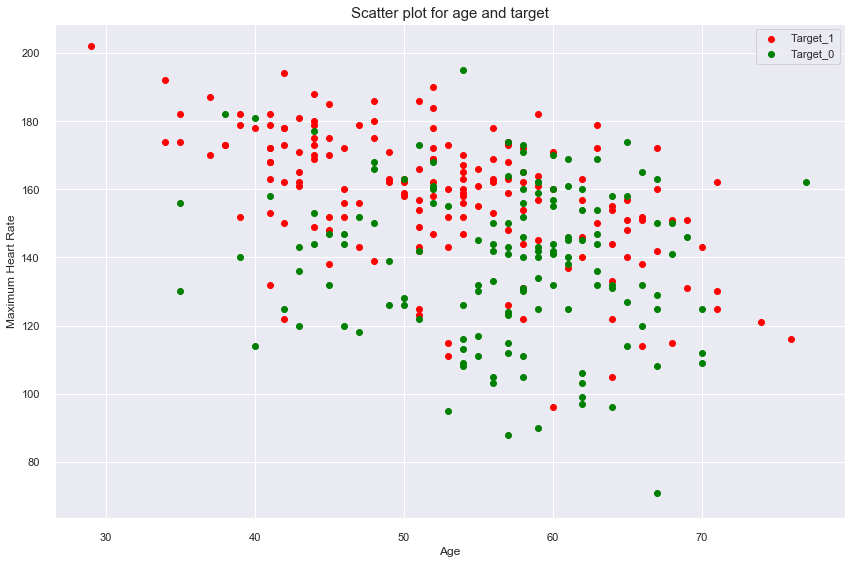

In [34]:
plt.scatter(x=df[df["target"]==1]["age"], y=df[df["target"]==1]["thalach"], c="red")
plt.scatter(x=df[df["target"]==0]["age"], y=df[df["target"]==0]["thalach"], c="green")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Target_1", "Target_0"])
plt.title("Scatter plot for age and target", fontsize = 15, fontweight = 30)
plt.tight_layout()
plt.show()

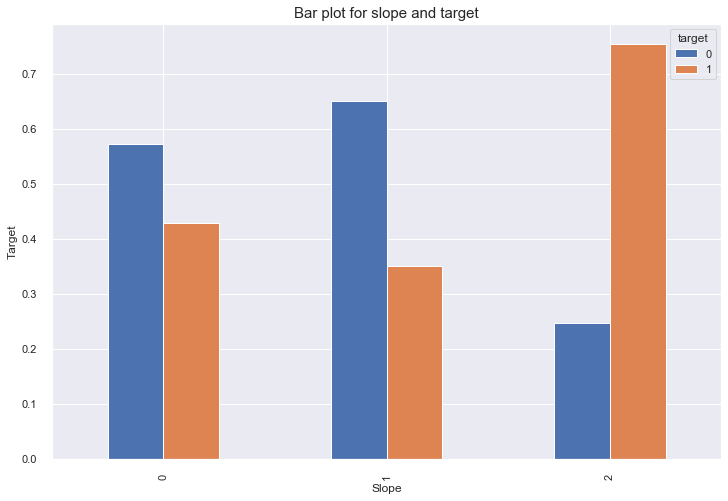

In [35]:
a = pd.crosstab(df["slope"], df["target"])
a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.title("Bar plot for slope and target", fontsize = 15, fontweight = 30)
plt.xlabel("Slope")
plt.ylabel("Target")
plt.show()

## 4.- Splitting into train and test datasets

In [36]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=43)

print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, y_train : {Y_train.shape}, y_test : {Y_test.shape}")

X_train : (242, 13), X_test : (61, 13), y_train : (242,), y_test : (61,)


* Standardisation

In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [38]:
y_train = to_categorical(Y_train, num_classes=None)
y_test = to_categorical(Y_test, num_classes=None)
print (f"y_train: {y_train.shape} after converting into 'to_categorical'")
print (f"y_test: {y_test.shape} after converting into 'to_categorical'")

y_train: (242, 2) after converting into 'to_categorical'
y_test: (61, 2) after converting into 'to_categorical'


## 5. - Principal Components

In [39]:
pca = PCA().fit(X_train)

In [40]:
print(f"Explained variance ratio:{pca.explained_variance_ratio_} for the following variables: {X_train.columns.values.tolist()}")

Explained variance ratio:[0.20730067 0.12505843 0.0968126  0.09140527 0.08241541 0.07309871
 0.06499639 0.05804361 0.05335768 0.04702074 0.04047055 0.03240366
 0.02761627] for the following variables: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


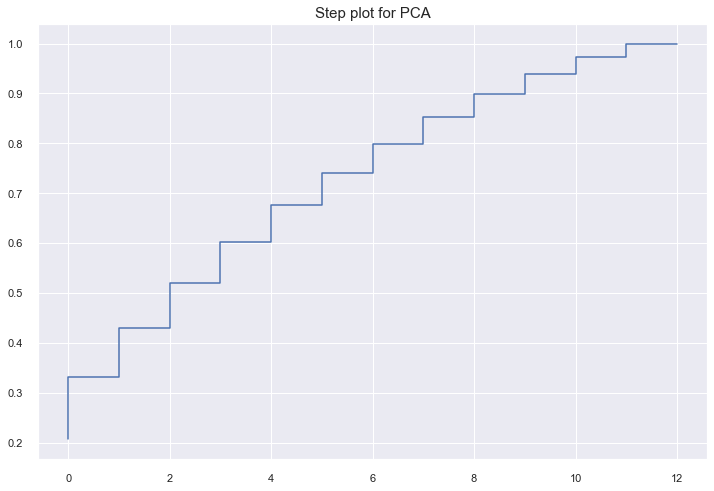

In [41]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.title("Step plot for PCA", fontsize=15)
plt.show()

## 6.- Neural Network

In [42]:
def create_model():
    
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(2, activation='softmax'))
    
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [43]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - ETA: 12s - loss: 0.6939 - accuracy: 0.600 - ETA: 0s - loss: 0.6936 - accuracy: 0.500 - ETA: 0s - loss: 0.6928 - accuracy: 0.58 - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5950 - val_loss: 0.6911 - val_accuracy: 0.5410
Epoch 2/50
242/242 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.30 - ETA: 0s - loss: 0.6911 - accuracy: 0.57 - ETA: 0s - loss: 0.6891 - accuracy: 0.64 - 0s 672us/step - loss: 0.6893 - accuracy: 0.6405 - val_loss: 0.6841 - val_accuracy: 0.7049
Epoch 3/50
242/242 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 1.00 - ETA: 0s - loss: 0.6814 - accuracy: 0.70 - ETA: 0s - loss: 0.6775 - accuracy: 0.75 - 0s 688us/step - loss: 0.6770 - accuracy: 0.7438 - val_loss: 0.6587 - val_accuracy: 0.8525
Epoch 4/50
242/242 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.70 - ETA: 0s - loss: 0.6600 - accuracy: 0.78 - ETA: 0

242/242 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 1.00 - ETA: 0s - loss: 0.3208 - accuracy: 0.90 - ETA: 0s - loss: 0.3255 - accuracy: 0.89 - 0s 626us/step - loss: 0.3222 - accuracy: 0.8926 - val_loss: 0.2394 - val_accuracy: 0.9180
Epoch 30/50
242/242 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.70 - ETA: 0s - loss: 0.4178 - accuracy: 0.86 - ETA: 0s - loss: 0.3662 - accuracy: 0.88 - 0s 779us/step - loss: 0.3337 - accuracy: 0.8884 - val_loss: 0.2432 - val_accuracy: 0.9180
Epoch 31/50
242/242 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.90 - ETA: 0s - loss: 0.4022 - accuracy: 0.86 - ETA: 0s - loss: 0.3298 - accuracy: 0.88 - ETA: 0s - loss: 0.3231 - accuracy: 0.87 - 0s 903us/step - loss: 0.3146 - accuracy: 0.8802 - val_loss: 0.2351 - val_accuracy: 0.9180
Epoch 32/50
242/242 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.90 - ETA: 0s - loss: 0.3141 - accuracy: 0.88 - ETA: 0s - loss: 0.

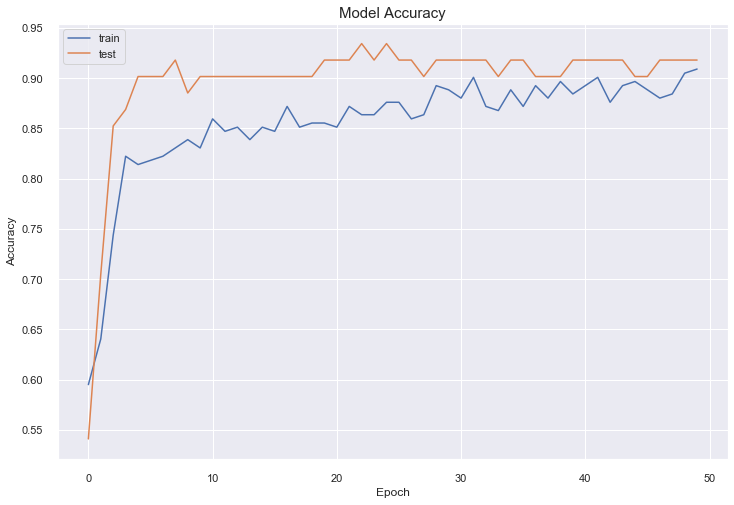

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

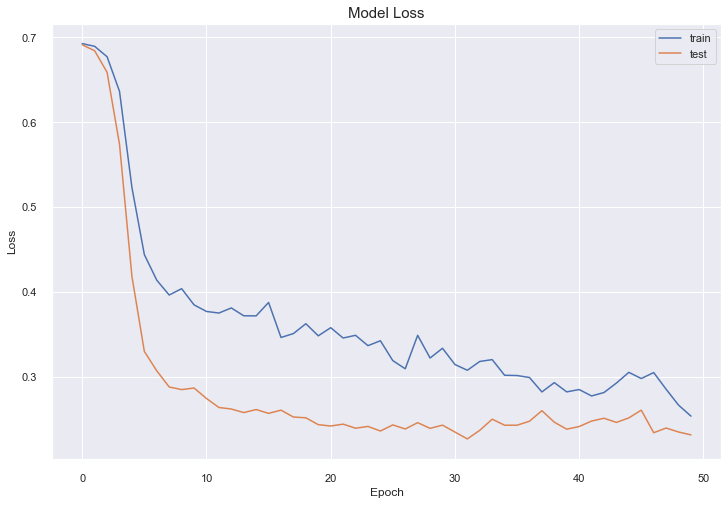

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

In [46]:
cat_pred = model.predict_classes(X_test)
rounded_y_test=np.argmax(y_test, axis=1)

In [47]:
print('Results for Neural Network')
print(accuracy_score(rounded_y_test, cat_pred))
print(classification_report(rounded_y_test, cat_pred))

Results for Neural Network
0.9180327868852459
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.87      1.00      0.93        33

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.93      0.92      0.92        61



## 7.- Neural Network with StratifiedKFold

In [48]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=43)

for train_index,test_index in kf.split(X,y):
    X_tr,X_ts = X.loc[train_index],X.loc[test_index]
    y_tr,y_ts = y.loc[train_index],y.loc[test_index]
    
print(f"Stratified K Model: Xtrain: {X_tr.shape}, Xtest: {X_ts.shape}, y_train: {y_tr.shape}, y_test: {y_ts.shape}")

Stratified K Model: Xtrain: (243, 13), Xtest: (60, 13), y_train: (243,), y_test: (60,)


In [49]:
X_train_scaled = scaler.fit_transform(X_tr)
X_tr = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_ts)
X_ts = pd.DataFrame(X_test_scaled)

In [50]:
y_tr = to_categorical(y_tr, num_classes=None)
y_ts = to_categorical(y_ts, num_classes=None)
print (f"y_train: {y_tr.shape} after converting into 'to_categorical'")
print (f"y_test: {y_ts.shape} after converting into 'to_categorical'")

y_train: (243, 2) after converting into 'to_categorical'
y_test: (60, 2) after converting into 'to_categorical'


In [51]:
def create_model():
    
    model_skf = Sequential()
    model_skf.add(Dense(32, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model_skf.add(Dropout(rate=0.20))
    model_skf.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model_skf.add(Dropout(rate=0.20))
    model_skf.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model_skf.add(Dropout(rate=0.20))
    model_skf.add(Dense(2, activation='softmax'))
    
    adam = Adam(lr=0.001)
    model_skf.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model_skf

model_skf = create_model()

print(model_skf.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                448       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [52]:
history_skf=model_skf.fit(X_tr, y_tr, validation_data=(X_ts, y_ts), epochs=50, batch_size=10)

Train on 243 samples, validate on 60 samples
Epoch 1/50
243/243 [==============================] - ETA: 6s - loss: 0.6961 - accuracy: 0.30 - ETA: 0s - loss: 0.6939 - accuracy: 0.50 - ETA: 0s - loss: 0.6925 - accuracy: 0.56 - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5885 - val_loss: 0.6856 - val_accuracy: 0.6833
Epoch 2/50
243/243 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.50 - ETA: 0s - loss: 0.6825 - accuracy: 0.63 - ETA: 0s - loss: 0.6762 - accuracy: 0.63 - 0s 685us/step - loss: 0.6749 - accuracy: 0.6214 - val_loss: 0.6561 - val_accuracy: 0.7333
Epoch 3/50
243/243 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.50 - ETA: 0s - loss: 0.6575 - accuracy: 0.65 - ETA: 0s - loss: 0.6443 - accuracy: 0.69 - 0s 644us/step - loss: 0.6329 - accuracy: 0.7078 - val_loss: 0.5848 - val_accuracy: 0.8000
Epoch 4/50
243/243 [==============================] - ETA: 0s - loss: 0.6059 - accuracy: 0.60 - ETA: 0s - loss: 0.5731 - accuracy: 0.75 - ETA: 0s -

243/243 [==============================] - ETA: 0s - loss: 0.5931 - accuracy: 0.70 - ETA: 0s - loss: 0.3279 - accuracy: 0.90 - ETA: 0s - loss: 0.3657 - accuracy: 0.88 - ETA: 0s - loss: 0.3499 - accuracy: 0.87 - 0s 858us/step - loss: 0.3398 - accuracy: 0.8848 - val_loss: 0.2668 - val_accuracy: 0.9167
Epoch 25/50
243/243 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.90 - ETA: 0s - loss: 0.2977 - accuracy: 0.90 - ETA: 0s - loss: 0.3105 - accuracy: 0.90 - ETA: 0s - loss: 0.3089 - accuracy: 0.90 - 0s 907us/step - loss: 0.3091 - accuracy: 0.9053 - val_loss: 0.2643 - val_accuracy: 0.9167
Epoch 26/50
243/243 [==============================] - ETA: 0s - loss: 0.3170 - accuracy: 0.90 - ETA: 0s - loss: 0.3820 - accuracy: 0.88 - ETA: 0s - loss: 0.3369 - accuracy: 0.88 - ETA: 0s - loss: 0.3360 - accuracy: 0.88 - ETA: 0s - loss: 0.3011 - accuracy: 0.90 - 0s 1ms/step - loss: 0.2989 - accuracy: 0.9053 - val_loss: 0.2673 - val_accuracy: 0.9167
Epoch 27/50
243/243 [============

243/243 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.90 - ETA: 0s - loss: 0.2736 - accuracy: 0.90 - ETA: 0s - loss: 0.2583 - accuracy: 0.90 - 0s 800us/step - loss: 0.2626 - accuracy: 0.8930 - val_loss: 0.2959 - val_accuracy: 0.9333
Epoch 50/50
243/243 [==============================] - ETA: 0s - loss: 0.2746 - accuracy: 0.80 - ETA: 0s - loss: 0.2588 - accuracy: 0.88 - ETA: 0s - loss: 0.2633 - accuracy: 0.89 - ETA: 0s - loss: 0.2351 - accuracy: 0.91 - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9136 - val_loss: 0.3063 - val_accuracy: 0.9167


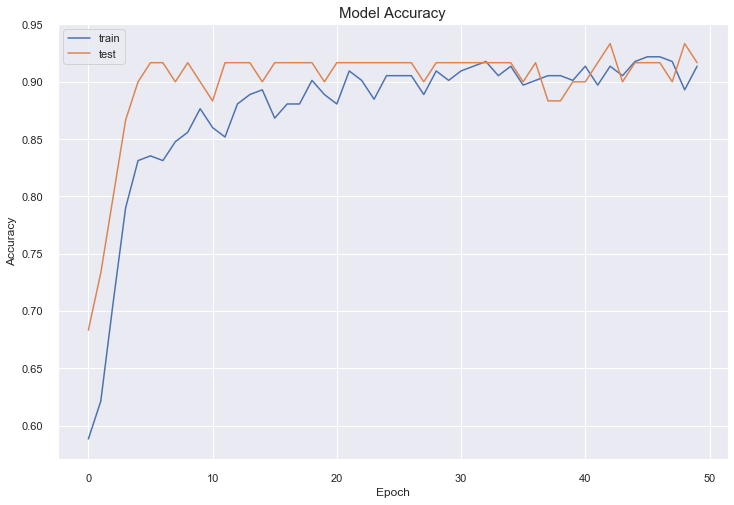

In [53]:
plt.plot(history_skf.history['accuracy'])
plt.plot(history_skf.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

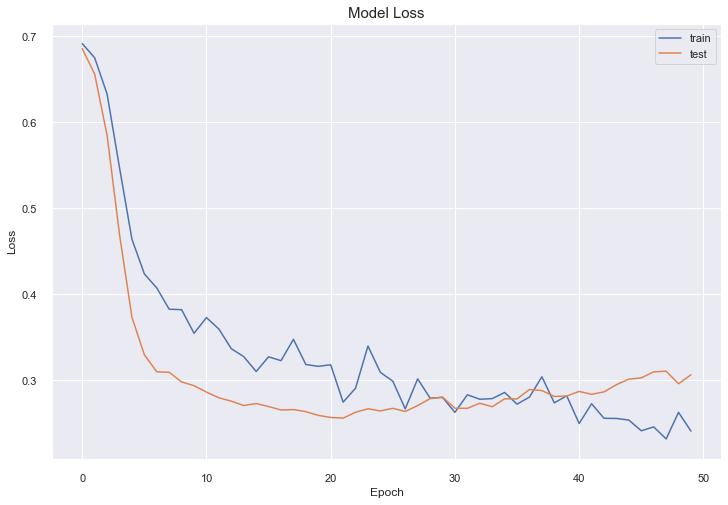

In [54]:
plt.plot(history_skf.history['loss'])
plt.plot(history_skf.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

In [55]:
cat_pred_kfs = model_skf.predict_classes(X_ts)
rounded_y_test_kfs =np.argmax(y_ts, axis=1)

print('Results for Neural Network with Stratified K Fold')
print(accuracy_score(rounded_y_test_kfs, cat_pred_kfs))
print(classification_report(rounded_y_test_kfs, cat_pred_kfs))

Results for Neural Network with Stratified K Fold
0.9166666666666666
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        33

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.92      0.92      0.92        60



## 8.- Random Forest Classifier

In [56]:
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, n_jobs=-1)

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=43)

for train_index,test_index in kf.split(X,y):
    X_tr,X_ts = X.loc[train_index],X.loc[test_index]
    y_tr,y_ts = y.loc[train_index],y.loc[test_index]

model_rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [57]:
y_pred_rf = model_rf.predict(X_ts)

In [58]:
print('Results for Random Forest Clf')
print(accuracy_score(y_ts, y_pred_rf))
print(classification_report(y_ts, y_pred_rf))

Results for Random Forest Clf
0.9166666666666666
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        33

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



* Permutation Importance

In [59]:
random_state=43

perm = PermutationImportance(model_rf , random_state=random_state).fit(X_ts, y_ts)
eli5.show_weights(perm, feature_names = X_ts.columns.tolist())

Weight,Feature
0.1133 ± 0.0490,ca
0.0633 ± 0.0573,thal
0.0567 ± 0.0267,oldpeak
0.0467 ± 0.0772,cp
0.0300 ± 0.0389,exang
0.0267 ± 0.0267,slope
0.0200 ± 0.0389,thalach
0.0133 ± 0.0327,sex
0.0133 ± 0.0133,restecg
0.0067 ± 0.0163,trestbps


* Partial Dependence Plot

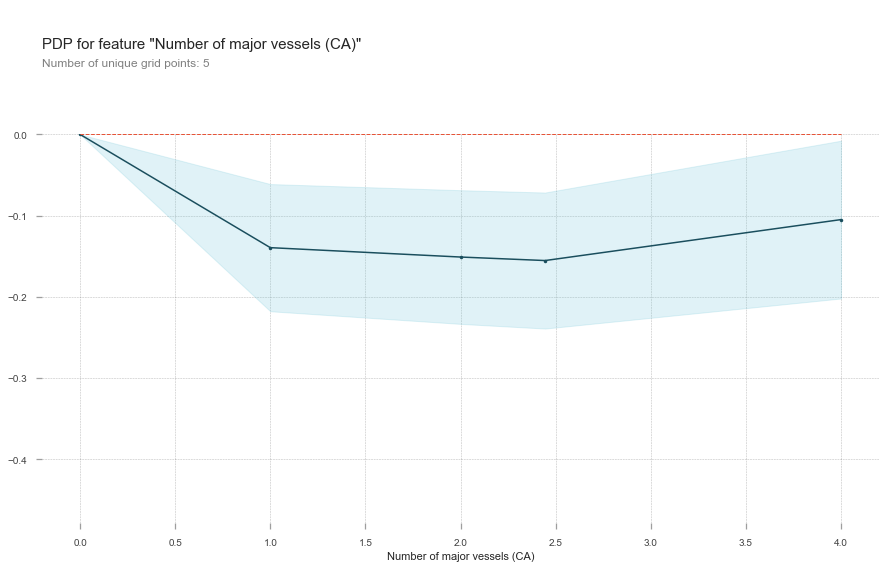

In [60]:
features = [c for c in X_ts.columns]

pdp_dpd_ca = pdp.pdp_isolate(model=model_rf, dataset=X_ts, model_features=features, feature="ca")
pdp.pdp_plot(pdp_dpd_ca, 'Number of major vessels (CA)')
plt.show()

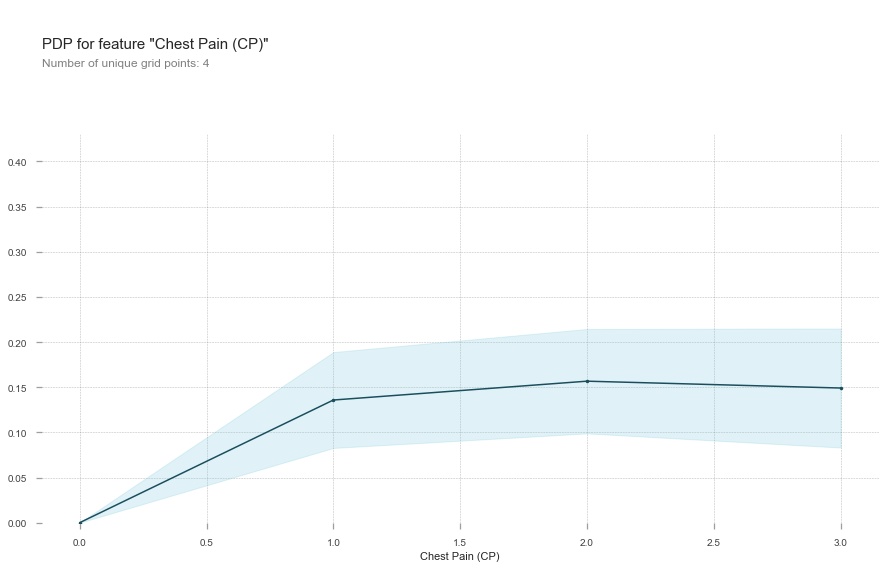

In [62]:
pdp_dpd_cp = pdp.pdp_isolate(model=model_rf, dataset=X_ts, model_features=features, feature="cp")
pdp.pdp_plot(pdp_dpd_cp, 'Chest Pain (CP)')
plt.show()

## 9.- Random Forest / KNeighbors / SGD

In [63]:
n_jobs = -1


X_tr_1, X_ts_1, y_tr_1, y_ts_1 = train_test_split(X, y, test_size=0.2, random_state=random_state)

cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=random_state)

pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))])
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))])
pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500))])


grid_params_rf = [{
                'rf__criterion': ['entropy', 'gini'],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [20, 70]
                }]

grid_params_knn = [{'knn__n_neighbors': [3,5,10,15,20]}]

grid_params_sgd = [{
                    'sgd__loss': ['log'],
                    'sgd__learning_rate': ['adaptive'],
                    'sgd__eta0': [0.001, 0.01, 0.1],
                    'sgd__penalty': ['l1', 'l2', 'elasticnet'], 
                    'sgd__alpha':[0.1, 1, 5, 10]
                    }]


gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf, scoring='accuracy', cv=cv)

gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn, scoring='accuracy', cv=cv)

gs_sgd = GridSearchCV(pipe_sgd, param_grid=grid_params_sgd, scoring='accuracy', cv=cv)


In [64]:
X_train_scaled = scaler.fit_transform(X_tr_1)
X_tr_1 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_ts_1)
X_ts_1 = pd.DataFrame(X_test_scaled)

In [65]:
it_models = [gs_rf, gs_knn, gs_sgd]
dic_models = {0:'RandomForest', 1:'Knn', 2:'SGD'}

In [66]:
result_acc = {}
result_auc = {}
models = []

for index, model in enumerate(it_models):

    print(f"Working on model: {dic_models[index]}")
    model.fit(X_tr_1, y_tr_1)
    print(f"Best parameters: {model.best_params_}")
    print(f"Best score: {model.best_score_}")
    print(f"Accuracy score: {model.score(X_ts_1, y_ts_1)}")
    print(f"ROC_AUC_Score: {roc_auc_score(y_ts_1, model.predict_proba(X_ts_1)[:,1])}")
    models.append(model.best_estimator_)
    result_acc[index] = model.best_score_
    result_auc[index] = roc_auc_score(y_ts_1, model.predict_proba(X_ts_1)[:,1])

Working on model: RandomForest
Best parameters: {'rf__criterion': 'gini', 'rf__min_samples_split': 5, 'rf__n_estimators': 20}
Best score: 0.8259353741496598
Accuracy score: 0.8852459016393442
ROC_AUC_Score: 0.9512987012987013
Working on model: Knn
Best parameters: {'knn__n_neighbors': 5}
Best score: 0.8098639455782314
Accuracy score: 0.8688524590163934
ROC_AUC_Score: 0.9031385281385281
Working on model: SGD
Best parameters: {'sgd__alpha': 0.1, 'sgd__eta0': 0.001, 'sgd__learning_rate': 'adaptive', 'sgd__loss': 'log', 'sgd__penalty': 'l2'}
Best score: 0.8138605442176872
Accuracy score: 0.9016393442622951
ROC_AUC_Score: 0.9577922077922078


In [67]:
a = pd.DataFrame(list(zip(dic_models.values(), result_acc.values(), result_auc.values())), columns=['Model', 'Accuracy rate','ROC AUC rate']).set_index("Model")
print(a)

              Accuracy rate  ROC AUC rate
Model                                    
RandomForest       0.825935      0.951299
Knn                0.809864      0.903139
SGD                0.813861      0.957792


<Figure size 576x576 with 0 Axes>

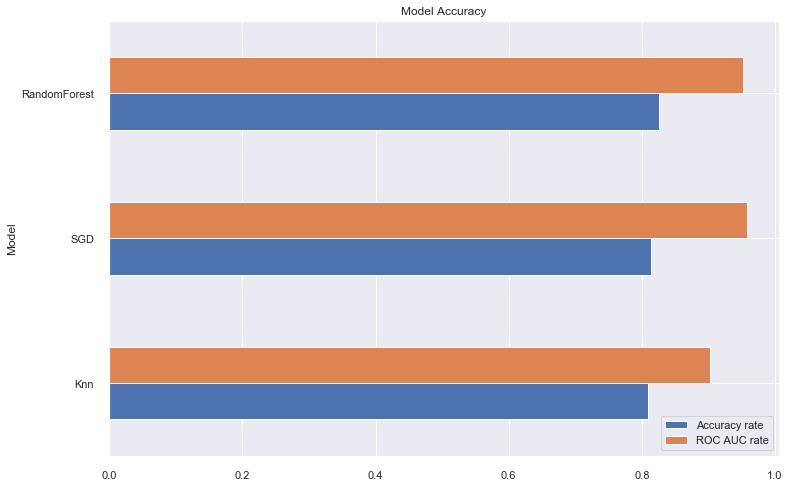

In [68]:
fig= plt.figure(figsize=(8,8))
a.sort_values(by="Accuracy rate").plot.barh()
plt.title('Model Accuracy')
plt.show()

* SHAP Values

Using 243 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


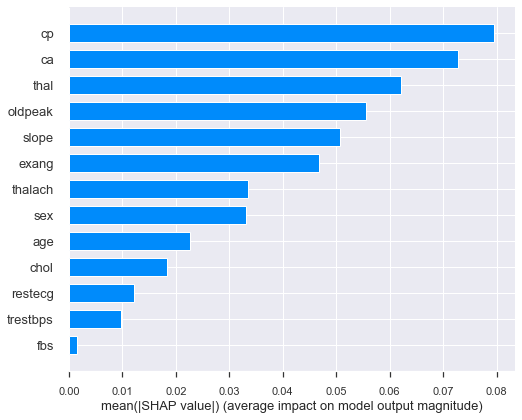

In [69]:
explain = shap.KernelExplainer(model_rf.predict_proba, X_tr)
shap_values = explain.shap_values(X_ts)
shap.summary_plot(shap_values[1], X_ts, plot_type="bar")


In [70]:
shap.initjs()

patient = X_ts.iloc[1,:].astype(float)
shap_values = explain.shap_values(patient)

shap.force_plot(explain.expected_value[1], shap_values[1], patient)
